# Project 1: Employee Attrition Analyse
In dit project ga ik een fictionele dataset analyseren over Employee Attrition. Deze dataset is op Kaggle gevonden, onder de titel `IBM HR Analytics Employee Attrition & Performance`.
Het doel van de analyse zelf is te achterhalen wat de drijvende factoren zijn achter de attritie in dit fictieve bedrijf.

## Sectie 1: De data voorbereiden
In deze sectie importeer ik de relevante libraries en laad ik de data in. Ook bekijk ik hier de data en doe een initiële analyse.

### 1a: Initiële technische analyse en schoonmaak
Ik begin door een head aan te roepen, zowel als door te bekijken hoeveel rijen en kolommen er zijn. Ik wil ook direct weten hoeveel null values er zijn en of ik de data zal moeten cleanen.
De head geeft me inzicht in hoe de waarden zijn ingevuld, en een `info()` functie zal me alles vertellen wat ik moet weten over de datatypen en hoeveelheid null waarden, etc.
Ik zal dus eerst de `info()` aanroepen.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

basedata = pd.read_csv('Employee_attrition.csv')
basedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Nu ik een beeld heb van de kolommen en datatypen, roep ik een `.head()` aan om in te zien hoe de kolommen ingevuld zijn. Hiervoor zullen drie rijen genoeg zijn.

In [2]:
basedata.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


Als eerste valt op dat de `Attrition` waarde een string van 'Yes' of 'No' is. Dit vind ik niet nuttig, aangezien het zo moeilijker toe te passen is in verschillende grafieken en formules. Dit zal ik dus direct omzetten zodat 'Yes' een '1' wordt en 'No' een '0'. Daarna zet ik de kolomtype om tot een int64.

In [3]:
basedata['Attrition'] = basedata['Attrition'].replace(['Yes','No'],['1','0'])
basedata['Attrition'] = basedata['Attrition'].astype('int64')

Nu dit gedaan is ga ik enkele kolommen verwijderen die ik persoonlijk niet als nuttig zie. Dit zijn de kolommen met 'rate', aangezien deze kolommen voor HR intern zijn en dus vanuit het perspectief van personeel niet relevant is. Ook de kolom 'Over18' mag naar huis, want deze heeft maar een enkele waarde. Ook 'StockOptionLevel' wordt gedropt omdat het mij niet duidelijk is waar deze kolom voor staat en het niet uitgelegd wordt in de bron van de dataset.

In [4]:
basedata.drop(columns=['Over18', 'MonthlyRate', 'DailyRate', 'HourlyRate', 'StockOptionLevel',], inplace=True)

Nu gaan we door middel van een `describe()` functie eens kijken naar wat algemene info over de dataset.

In [5]:
basedata.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,1.0,1024.865306,2.721769,2.729932,2.063946,2.728571,...,3.153741,2.712245,80.0,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,8.106864,1.024165,0.0,602.024335,1.093082,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.0,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,1.0,491.250000,2.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,80.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1.0,1020.500000,3.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,80.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1.0,1555.750000,4.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,80.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,1.0,2068.000000,4.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,80.0,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Aangezien dit hele onderzoek over Attrition gaat, wil ik ook gelijk de verdeling van de dataset op dat punt weten. Onder de mean van attrition kunnen we zien dat het maar over zo'n 16% van de dataset gaat. Hier lees ik dus uit af dat de dataset niet netjes gebalanceerd is.

Ik zie dat er kolommen zijn met standard deviation 0. Deze zijn ook niet nuttig voor mijn analyse, aangezien deze dus maar 1 waarde bevatten. Deze kolommen verwijder ik dus ook uit de analyse.

In [6]:
for x in basedata.select_dtypes(include=[np.int64]):
        print(f"{x}: {basedata[x].std()}")

Age: 9.135373489136734
Attrition: 0.36786303197196357
DistanceFromHome: 8.106864435666084
Education: 1.0241649445978729
EmployeeCount: 0.0
EmployeeNumber: 602.024334847475
EnvironmentSatisfaction: 1.0930822146349994
JobInvolvement: 0.7115611429632283
JobLevel: 1.1069398989351114
JobSatisfaction: 1.1028461230547149
MonthlyIncome: 4707.956783097995
NumCompaniesWorked: 2.498009006070751
PercentSalaryHike: 3.659937716539636
PerformanceRating: 0.36082352460434486
RelationshipSatisfaction: 1.081208886440361
StandardHours: 0.0
TotalWorkingYears: 7.780781675515004
TrainingTimesLastYear: 1.2892706207958435
WorkLifeBalance: 0.7064758297141522
YearsAtCompany: 6.126525152403566
YearsInCurrentRole: 3.6231370346706395
YearsSinceLastPromotion: 3.222430279137968
YearsWithCurrManager: 3.5681361205404407


In [7]:
basedata.drop(columns = ['StandardHours','EmployeeCount'], inplace = True)

### 1b: Initiële inhoudelijke vragen
Nu ik de data wat hanteerbaarder heb gemaakt door data te verwijderen die geen toegevoegde waarde hebben, ga ik wat basale inhoudelijke vragen stellen over de data.

#### Rolverdelingen
Te beginnen met de verdeling van de attrition binnen de verschillende afdelingen. We roepen een lijst aan met de hoeveelheden van elke rol in elke department en dan halen we de percentages van attrition per department erbij.

In [8]:
print(basedata.groupby(['JobLevel','Department'])['JobRole'].value_counts())
print()

for role in basedata.JobRole.unique():
    role1= len(basedata[(basedata['JobRole']== role) & (basedata['Attrition'] == 1)].value_counts())
    role0= len(basedata[(basedata['JobRole']== role)].value_counts())
    print(f"In de rol {role} is er ~{round((role1/role0)*100)}% attrition.")
print()

for dep in basedata.Department.unique():
    dep1= len(basedata[(basedata['Department']== dep) & (basedata['Attrition'] == 1)].value_counts())
    dep0= len(basedata[(basedata['Department']== dep)].value_counts())
    print(f"In de afdeling {dep} is er ~{round((dep1/dep0)*100)}% attrition.")


JobLevel  Department              JobRole                  
1         Human Resources         Human Resources               33
          Research & Development  Research Scientist           234
                                  Laboratory Technician        200
          Sales                   Sales Representative          76
2         Human Resources         Human Resources               13
          Research & Development  Manufacturing Director        90
                                  Healthcare Representative     78
                                  Research Scientist            57
                                  Laboratory Technician         56
          Sales                   Sales Executive              233
                                  Sales Representative           7
3         Human Resources         Human Resources                6
          Research & Development  Manufacturing Director        45
                                  Healthcare Representative     44
  

Wat mij direct het meest opvalt is dat het lijkt alsof attrition lager wordt naarmate de rang in de hierarchie hoger wordt. Dit controleer ik door middel van een simpele lineplot zowel als een violinplot, zodat ik ook oog houd op de aantallen.

<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

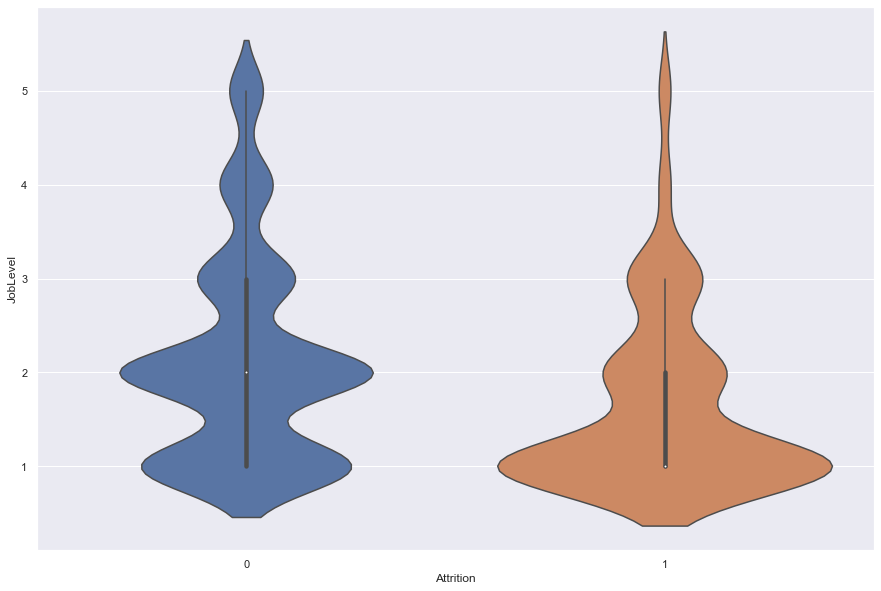

In [9]:
sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(data = basedata, x = 'Attrition', y = 'JobLevel', inner = 'box')

<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

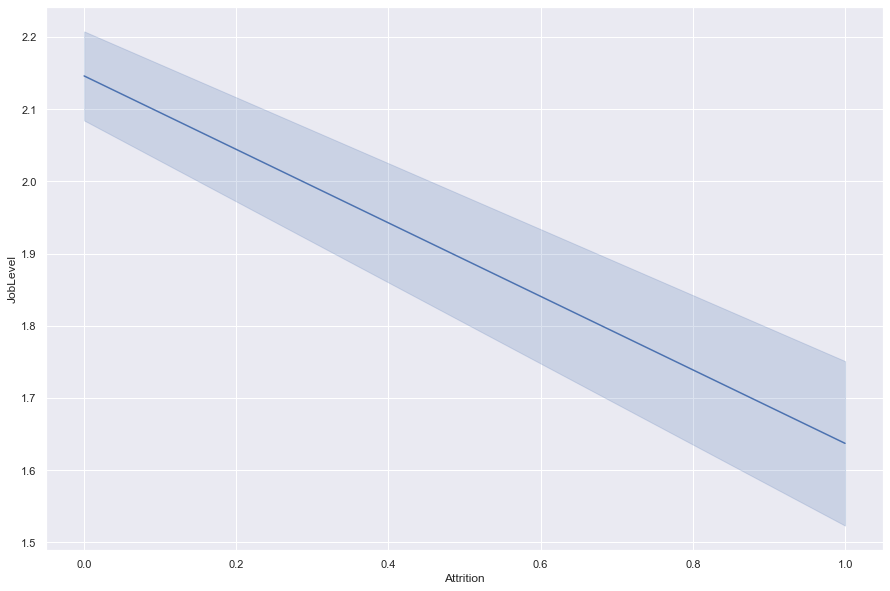

In [10]:
sns.lineplot(data = basedata, x = 'Attrition', y = 'JobLevel')

Deze intuitie blijkt te kloppen. Het blijkt dat zo'n 75% van de Attrition zich in joblevel 1 en 2 bevinden. Het is dan ook daar waar de meeste, en mogelijk de makkelijkste, winst te behalen is. Aangezien dat voor een bedrijf het meest interessant is, zal de rest van deze analyse zich daar mee bezig houden. 

Nu we de verdeling weten, vind ik het tijd voor een heatmap om in 1 klap een mooi algemeen beeld te krijgen van wat voor zaken een invloed hebben op de attrition. Met de opgedane kennis van hierboven kunnen we de data van de heatmap in perspectief zetten, wat ons tot betere vervolgvragen kan leiden.

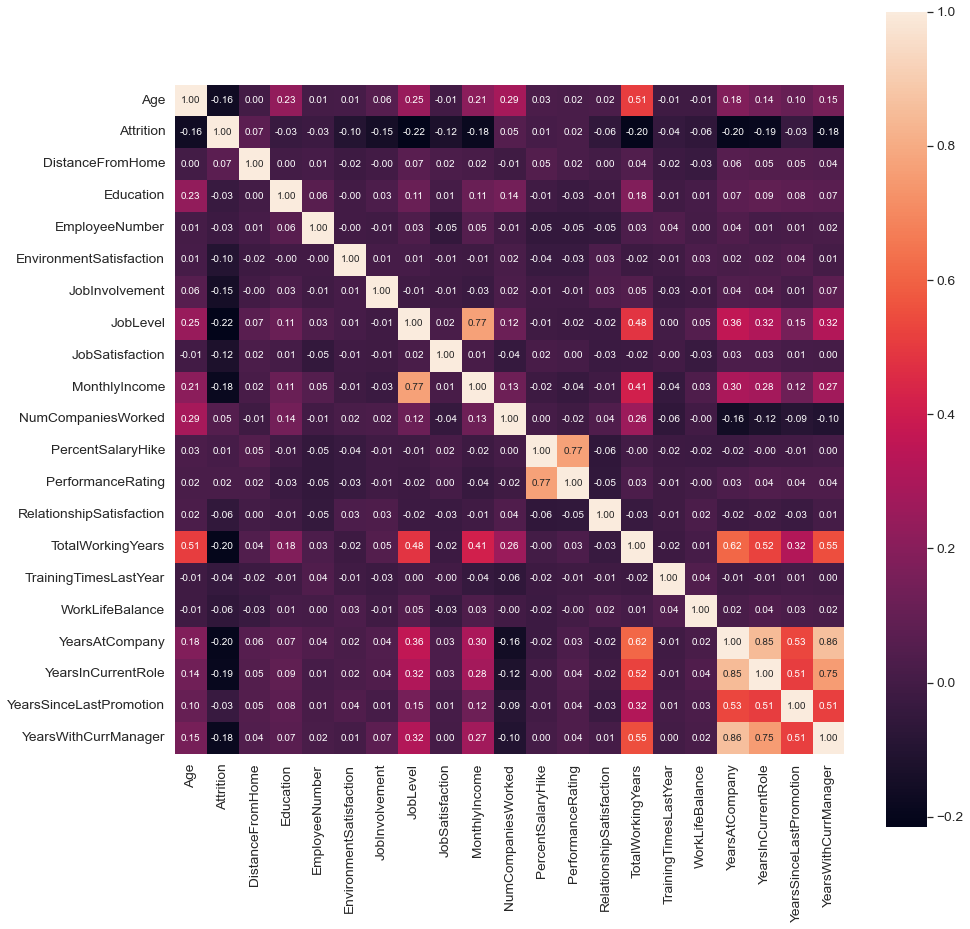

In [11]:
L12data = basedata[basedata['JobLevel'] <= 2]
basecorr= L12data.corr()
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,15))
hm_shows= sns.heatmap(basecorr,cbar=True, annot=True, square=True, fmt= ".2f", annot_kws={"size":10,},yticklabels= basecorr.index, xticklabels=basecorr.index)
plt.show()

## Sectie 2: Inhoudelijke analyse
Op basis van de indicaties die we in de voorgaande sectie hebben gekregen, gaan we nu specifieke vragen stellen.
De heatmap vertelt ons bepaalde dingen over hoe het bedrijf functioneert. Zo leren we de volgende dingen:
* Er zijn maar weinig zaken die een signifancte lineaire correlatie hebben met attritie.
* Het bedrijf beloont loyaliteit niet noodzakelijk met promoties en de werkomgeving kan stagnant zijn. Dit is te zien in het feit dat er een hoge mate van correlatie is tussen de `YearsAtCompany` en `YearsInCurrentRole` zowel als `YearsSinceLastPromotion`, al is deze laatste wel al meer variabel. Wel blijkt het dat de omgeving veelal dezelfde blijft, aangezien `YearsWithCurrManager` ook een hoge mate van correlatie heeft met `YearsAtCompany`. We zien dat er weinig correlatie is tussen `YearsAtCompany` etc en `TrainingTimesLastYear`. Dit betekent dat het bedrijf niet veel mogelijkheden biedt om te groeien.
* Het bedrijf beloont loyaliteit zowel als goede resultaten wel degelijk financiëel, zoals te zien is in de correlaties met `MonthlyIncome`, met een hoge correlatie tussen `PercentageSalaryHike` en `PerformanceRating`. Dit is ook te zien in de correlaties tussen `YearsAtCompany` etc en `MonthlyIncome`. Hier zien we alleen wel het eerste knelpunt ontstaan. Er is een sterke correlatie tussen `MonthlyIncome` en `JobLevel`. Dit toont dat, ondanks het feit dat loyaliteit en resultaten financiëel beloond worden, dit misschien niet een significant genoege beloning is om mensen te behouden.

### Sectie 2b: Grafische representaties van de verschillende correlaties
Hieronder zullen we de bovengenoemde correlaties grafisch weergeven om er zodanig nieuwe inzichten uit proberen te verwerven.
We zullen de volgende correlaties onderzoeken:
De eerste set correlaties betreffen de factoren betreffende tijd in het bedrijf en in de huidige omgeving.
* `Attrition` en `Age`, `YearsAtCompany`, `YearsInCurrentRole`.
De tweede set correlaties betreffen de inhoudelijke factoren van het werk.
* `Attrition` en `MonthlyIncome`, `JobInvolvement`, `PerformanceRating`, `JobSatisfaction`.
Dit alles wordt op basis van JobLevel 1 en 2 gedaan. In `Sectie 1b` is te zien welke rollen dat zijn.

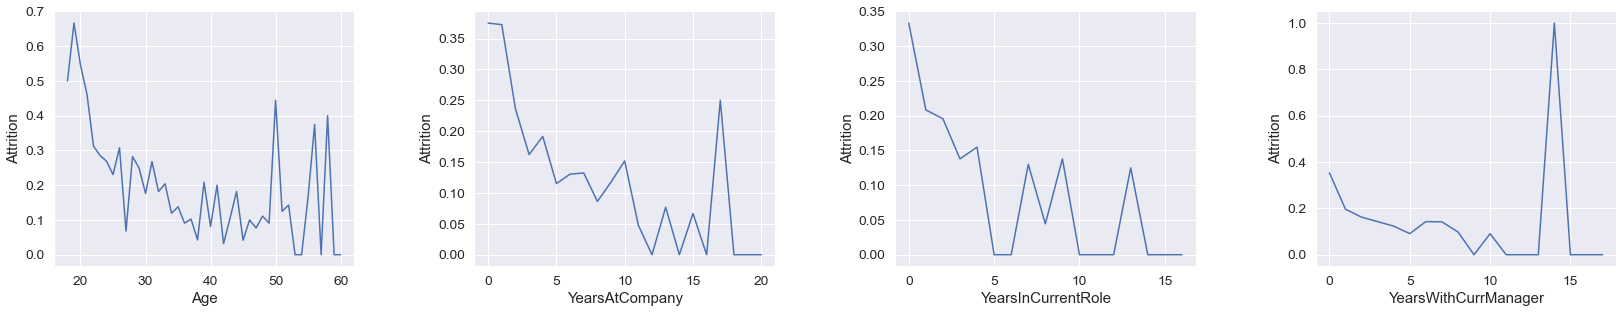

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(28,30))
plt.subplot(4,4,1)
sns.lineplot(data = L12data, x = 'Age', y = 'Attrition', err_style= None)
plt.subplot(4,4,2)
sns.lineplot(data = L12data, x = 'YearsAtCompany', y = 'Attrition', err_style= None)
plt.subplot(4,4,3)
sns.lineplot(data = L12data, x = 'YearsInCurrentRole', y = 'Attrition', err_style= None)
plt.subplot(4,4,4)
sns.lineplot(data = L12data, x = 'YearsWithCurrManager', y = 'Attrition', err_style= None)
plt.subplots_adjust(wspace=0.4, hspace=0.8)

Uit de bovenstaande grafieken kunnen we aflezen dat het grootste deel van de attritie in de eerste 5 jaar gebeurt. Na het 5-jaarpunt verzwakt deze trend. De correlatie tussen attritie en hoeveelheid jaren bij huidige manager zien we eigenlijk dezelfde trend weer bevestigd, behalve dat er na 5 jaar een kleine sprong is.

We zien ook dat de relaties niet zozeer lineair zijn. Door het transformeren van de data kunnen we mogelijk toch lineaire regressietools toepassen. Ook gaan we inzoomen op de data om ons te concentreren op de eerste 5 jaar bij het bedrijf. Dit voeren we hieronder uit. 

C:\Users\Oamoh\AppData\Local\Temp\ipykernel_6336\3928952174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L12data['Age_log'] = np.log(L12data['Age'])
C:\Users\Oamoh\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Oamoh\AppData\Local\Temp\ipykernel_6336\3928952174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L12data['YearsAtCompany_log'] = np.log(L12data['YearsAtCompany'])
C:

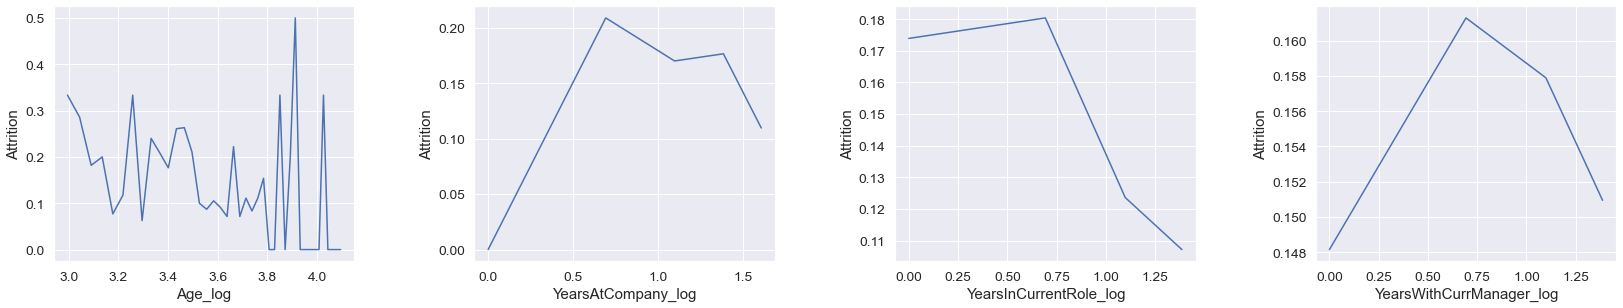

In [13]:
L12data['Age_log'] = np.log(L12data['Age'])
L12data['YearsAtCompany_log'] = np.log(L12data['YearsAtCompany'])
L12data['YearsInCurrentRole_log'] = np.log(L12data['YearsInCurrentRole'])
L12data['TrainingTimesLastYear_log'] = np.log(L12data['TrainingTimesLastYear'])
L12data['YearsWithCurrManager_log'] = np.log(L12data['YearsWithCurrManager'])
L12data.replace([np.inf, -np.inf], np.nan, inplace=True)
L12data.dropna(inplace=True)
Newdata = L12data[L12data['YearsAtCompany'] <= 5]
fig, ax = plt.subplots(1, 4, figsize=(28,30))
plt.subplot(4,4,1)
sns.lineplot(data = Newdata, x = 'Age_log', y = 'Attrition', err_style= None)
plt.subplot(4,4,2)
sns.lineplot(data = Newdata, x = 'YearsAtCompany_log', y = 'Attrition', err_style= None)
plt.subplot(4,4,3)
sns.lineplot(data = Newdata, x = 'YearsInCurrentRole_log', y = 'Attrition', err_style= None)
plt.subplot(4,4,4)
sns.lineplot(data = Newdata, x = 'YearsWithCurrManager_log', y = 'Attrition', err_style= None)

plt.subplots_adjust(wspace=0.4, hspace=0.8)

Door te kijken naar de getransformeerde en geconcentreerde data zien we dat de correlatie in deze periode vrij duidelijk is. Het grootste risico voor het bedrijf ligt bij de eerste paar jaar in de lagere niveaus van de rangorde.

Hieronder onderzoeken we andere factoren, zoals salaris, werkervaring, drive en voldoening.

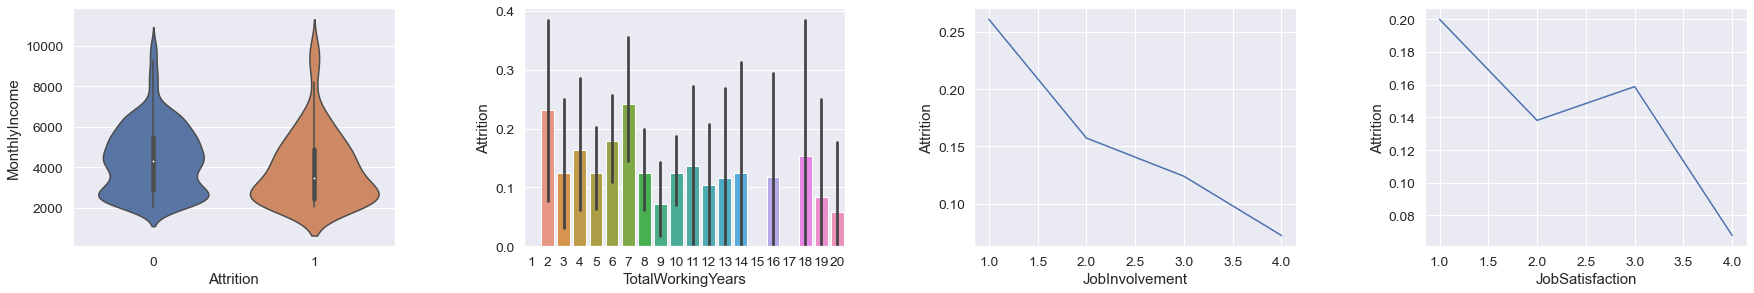

In [14]:
fig, ax = plt.subplots(1, 4, figsize=(30,28))
plt.subplot(4,4,1)
sns.violinplot(data = L12data, y = 'MonthlyIncome', x = 'Attrition')
plt.subplot(4,4,2)
sns.barplot(data = L12data, x = 'TotalWorkingYears', y = 'Attrition')
plt.subplot(4,4,3)
sns.lineplot(data = L12data, x = 'JobInvolvement', y = 'Attrition', err_style= None)
plt.subplot(4,4,4)
sns.lineplot(data = L12data, x = 'JobSatisfaction', y = 'Attrition', err_style= None)
plt.subplots_adjust(wspace=0.4, hspace=0.8)

De violinplot toont de maandsalarissen van de werknemers op Joblevel 1 en 2 van de groep die blijft en de groep die de werkplek verlaat. Hieruit kunnen we opmaken dat de mediaan van het maandloon van de attritiegroep structureel lager ligt dan dat van degenen die blijven. Uit de barplot kunnen we zien dat het degene zijn met de minste werkervaring die verreweg de hoogste kans hebben om het bedrijf te verlaten. We kunnen ook zien dat de drive voor het werk zowel als de voldoening die men eruit krijgt een relatief groot verschil maken voor de attritie.

## Interpretatie
De data wijst uit dat het grootste probleem van dit bedrijf ligt bij het stimuleren en ontwikkelen van nieuwe werknemers. De jonge arbeidskrachten functioneren goed maar zoeken een bedrijf waar ze kunnen groeien. Des te minder deze werknemers zich persoonlijk gebonden voelen aan het werk en des te minder dit werk voldoening geeft, des te meer ze verder kijken. Wanneer ze dan zien dat hun salaris ook nog onder de mediaan ligt, ondanks dat hun functioneren volgens de data goed (of zelfs uitstekend) is, zoeken ze verder. Uit de heatmap kunnen we ook opmaken dat dit niets te maken heeft met het functioneren of het opleidingsniveau van de werknemer.

Het lijkt erop dat het bedrijf de meeste winst kan behalen door zich te concentreren op programmas waarmee ze nieuwe werknemers een toekomstperspectief bieden en ze daarmee dus meerdere jaren vasthouden. Hierbij een publicatie van IBM citerend:
"**Employees who do not feel they can achieve their career goals at their current organization are 12 times more likely to consider leaving than employees who do feel they can achieve their career goals. Even worse, this number skyrockets to about 30 times more likely for new employees. Considering the amount companies invest in the recruitment process and the time lost to filling the same role again, the impact to performance and margin can be significant.**"

# Prediction modeling

Ik zal nu proberen op basis van de data een prediction model op te zetten. Ik begin met het voorbereiden van de data.

Ik importeer de relevante sklearn module om een train/test split te maken. Hierna definieer ik welke kolommen ik wil gebruiken in mijn onderzoek en welke kolom de target moet worden.

In [15]:
from sklearn.model_selection import train_test_split

feature_names = [
       'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'Age', 'YearsAtCompany', 'YearsInCurrentRole',
       'TrainingTimesLastYear', 'YearsWithCurrManager']
target_name = 'Attrition'
X = L12data[feature_names]
y = L12data[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

## Instance

Nu maak en run ik een instance van de estimator. We laten alle waarden op de default en gaan gelijk door naar het trainen van de estimator.

In [16]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

LinearRegression()

## Evalutatie

Nu de estimator gemaakt en getraind is gaan we deze evalueren.

In [17]:
from sklearn.metrics import mean_squared_error

y_pred_test = linear_regression_model.predict(X_test)
error_metric = mean_squared_error(y_pred = y_pred_test, y_true = y_test)
print("The mean square error of this model is: ", error_metric)

The mean square error of this model is:  0.09801944357366814


## Toepassing

Nu komt de waarde van toepassing. Op basis van dit model kunnen we de 5% van de werknemers terugvinden die de hoogste kans heeft om het bedrijf te verlaten. Dit doen we door te kijken in de dataset wie er (tot noch toe) bij het bedrijf is gebleven maar wel een hoge kans heeft om weg te willen gaan.

In [18]:
## De te analyseren groep definieren
stayers = basedata[basedata['Attrition'] == 0]

## Een Dataframe maken met een kolom die aangeeft wat hun kans is om het bedrijf te verlaten
predict_data = stayers[feature_names]
datatest = linear_regression_model.predict(predict_data)
predict_data['Attrit_prob'] = datatest

## Een risicogroep definieren op basis van de top 5% die kans heeft om weg te gaan
risk_group = predict_data.loc[predict_data["Attrit_prob"] >= predict_data["Attrit_prob"].quantile(0.95)]

## De risicogroep tonen
risk_group['MonthlyIncome'].mean() * 6 * (len(risk_group))
#risk_group

C:\Users\Oamoh\AppData\Local\Temp\ipykernel_6336\4252363542.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['Attrit_prob'] = datatest


1187928.0

# Conclusie

Door middel van een lineair regressiemodel en machine learning heb ik niet alleen een richtlijn weten te identificeren voor het bedrijf, maar ook een prediction model waarmee het bedrijf praktische stappen kan ondernemen om werknemers te behouden. Daar een gallup poll aantoont dat het vervangen van een werknemer wel 50%-75% van het jaarsalaris kan kosten, zou het tijdig in gesprek gaan met deze doelgroep van de top 5% een mogelijke besparing van meer dan $1.000.000,- opleveren.

In [19]:
risk_group

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsSinceLastPromotion,Age,YearsAtCompany,YearsInCurrentRole,TrainingTimesLastYear,YearsWithCurrManager,Attrit_prob
4,1,1,3,1,2,3468,9,12,3,4,6,3,2,27,2,2,3,2,0.436032
12,1,1,3,1,3,2911,1,17,3,4,5,2,4,31,5,2,1,3,0.296929
38,4,2,2,1,1,3419,9,14,3,4,6,4,0,36,1,1,3,0,0.401258
47,2,2,3,1,2,3022,4,21,4,1,8,3,0,37,1,0,1,0,0.315220
68,3,2,3,1,1,2194,4,13,3,4,5,2,1,35,3,2,2,2,0.321417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,2,1,3,2,1,5151,1,25,4,4,10,3,7,39,10,0,3,9,0.353645
1391,3,1,2,1,1,2858,4,14,3,1,20,2,0,38,1,0,3,0,0.363448
1411,3,3,3,1,2,2187,4,14,3,3,6,3,1,25,2,0,3,2,0.294509
1427,4,1,3,1,4,2406,8,19,3,3,8,2,0,40,1,0,3,0,0.290352
